In [1]:
# 1) design model (input, output size, forward pass)
# 2) construct loss and optimizer
# 3) training loop (forward pass, backward pass, update weights)

In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

epoch 10: loss = 4450.5532
epoch 20: loss = 3317.8906
epoch 30: loss = 2498.7698
epoch 40: loss = 1905.7418
epoch 50: loss = 1475.9615
epoch 60: loss = 1164.1952
epoch 70: loss = 937.8397
epoch 80: loss = 773.3628
epoch 90: loss = 653.7604
epoch 100: loss = 566.7298


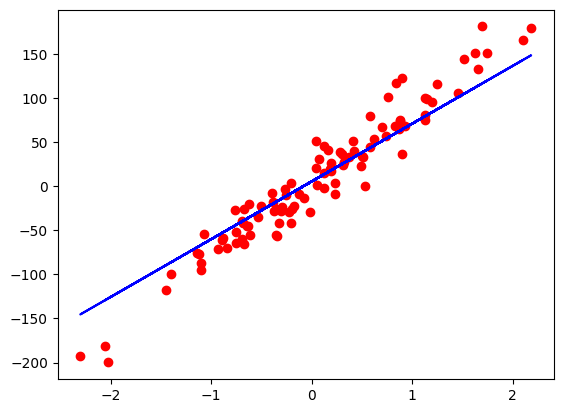

In [7]:
# 0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise =20, random_state =1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100

for epoch in range(num_epochs):
  y_predicted = model(X)
  loss = criterion(y_predicted,y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch +1) % 10 ==0:
    print(f"epoch {epoch+1}: loss = {loss:.4f}")

#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()